In [1]:
!pip install yfinance mplfinance pandas_ta

In [2]:
import yfinance as yf
import mplfinance as mpf
import pandas_ta as ta

<Axes: xlabel='Date'>

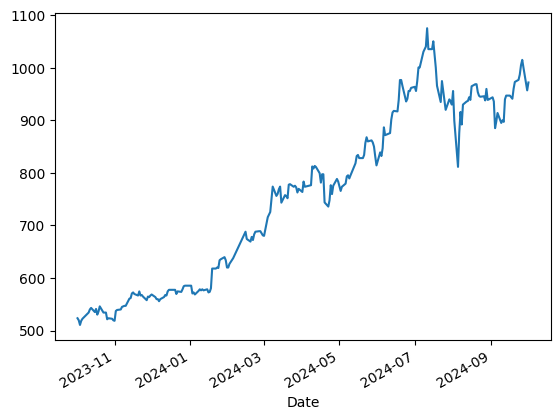

In [3]:
taiwan_2330_stock = yf.Ticker("2330.TW")      ## 我以台積電作為我的股票
data  = taiwan_2330_stock.history(period="1y")   ## 我抓取的時間是一年

data['Close'].plot() # 畫出收盤價圖片

# 作業的第一部分
計算技術指標(SMA、RSI、MACD),我在我的欄位新增了這些值

In [4]:
if 'Close' in data.columns:
    ## 計算SMA 指標(例如 10 和 20 的SMA)
    data['SMA_10'] = ta.sma(data['Close'], length=10)
    data['SMA_20'] = ta.sma(data['Close'], length=20)

    ## 計算RSI (例如14 期的RSI)
    data['RSI_14'] = ta.rsi(data['Close'], length=14)

    ##計算MACD
    data['EMA12'] = data['Close'].ewm(span=12, adjust=False).mean()
    data['EMA26'] = data['Close'].ewm(span=26, adjust=False).mean()
    data['MACD']  = data['EMA12'] - data['EMA26']
    data['Signal'] = data['MACD'].ewm(span=9, adjust=False).mean()

data['last_Close'] = data['Close'].shift(-1) #這個計算我的label，我的N是1，我要預測明天的股價。


In [5]:
# 要移除這個欄位中的缺失值(SMA_10, SMA_20, RSI_14, last_Close)
data_cleaned = data.dropna(subset=['SMA_10', 'SMA_20', 'RSI_14', 'last_Close'])
display(data_cleaned)

,Open,High,Low,Close,Volume,Dividends,Stock Splits,SMA_10,SMA_20,RSI_14,EMA12,EMA26,MACD,Signal,last_Close
Date,,,,,,,,,,,,,,,
2023-10-31 00:00:00+08:00,525.362373,525.362373,517.506487,519.470459,25667058,0.0,0.0,530.174072,529.486690,42.164875,527.947349,528.131462,-0.184113,1.813666,518.488403
2023-11-01 00:00:00+08:00,523.398331,523.398331,517.506418,518.488403,13603347,0.0,0.0,528.995685,529.241188,41.423921,526.492127,527.417162,-0.925035,1.265926,537.146240
2023-11-02 00:00:00+08:00,526.344396,537.146240,525.362410,537.146240,29401438,0.0,0.0,529.093890,530.124977,56.914863,528.131221,528.137834,-0.006613,1.011418,539.110229
2023-11-03 00:00:00+08:00,537.146258,539.110229,535.182286,539.110229,15426176,0.0,0.0,528.406512,531.548859,58.168925,529.820299,528.950604,0.869695,0.983074,540.092102
2023-11-06 00:00:00+08:00,543.038059,545.984016,540.092102,540.092102,29215201,0.0,0.0,528.995703,532.629044,58.814339,531.400577,529.775900,1.624676,1.111394,545.002075
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-09-24 00:00:00+08:00,976.000000,987.000000,971.000000,987.000000,26785975,0.0,0.0,946.898663,935.837390,62.357784,951.913833,943.020827,8.893006,0.769888,1005.000000
2024-09-25 00:00:00+08:00,1000.000000,1005.000000,998.000000,1005.000000,39405222,0.0,0.0,957.400000,939.196494,65.800156,960.080936,947.611877,12.469059,3.109722,1015.000000
2024-09-26 00:00:00+08:00,1010.000000,1015.000000,1005.000000,1015.000000,38321585,0.0,0.0,969.200000,941.960480,67.574282,968.530023,952.603590,15.926433,5.673064,1000.000000


# 作業第二部分
可視化K線圖




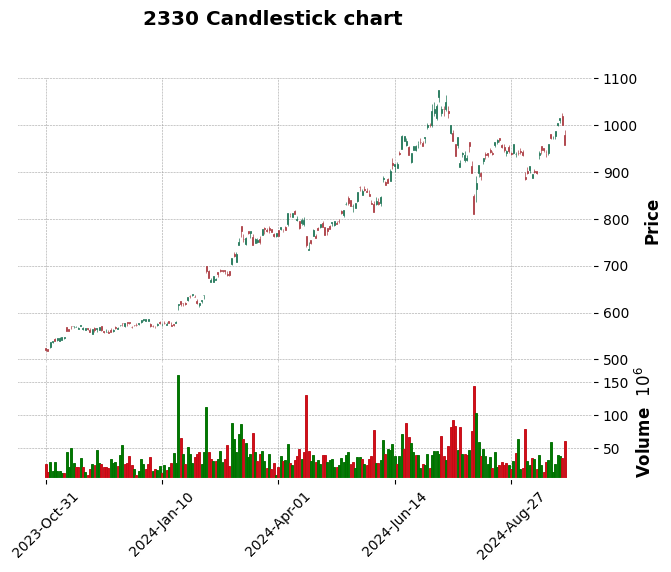

In [6]:
#繪製K 線圖
mpf.plot(data_cleaned, type='candle',style='charles',title='2330 Candlestick chart',volume=True)

# 作業第三部分
技術指標結合(線性回歸、決策數、隨機森林)預測第n天的股價。
我的n是設為1，我是預測明天的close資訊。

In [7]:
## 我會這是各個技術指標對模型的好壞。
features_SMA_10 = data_cleaned[['Open', 'High', 'Low', 'SMA_10']]
features_SMA_20 = data_cleaned[['Open', 'High', 'Low', 'SMA_20']]
features_RSI_14 = data_cleaned[['Open', 'High', 'Low', 'RSI_14']]
features_MACD = data_cleaned[['Open', 'High', 'Low', 'MACD']]

target = data_cleaned['last_Close']  ## 正確的結果

In [8]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [9]:
train_size = int(len(data_cleaned) * 0.8)  ## 劃分資料集。
def run_AI_model(this_data_name,feature_data, target):
    X_train, X_test = feature_data[:train_size], feature_data[train_size:]
    y_train, y_test = target[:train_size], target[train_size:]

    # Check the sizes of the split
    #print(len(X_train), len(X_test), len(y_train), len(y_test))  179 45 179 45


    linear_reg = LinearRegression()
    decision_tree = DecisionTreeRegressor()
    random_forest = RandomForestRegressor()

    # Train the models on the training data
    linear_reg.fit(X_train, y_train)
    decision_tree.fit(X_train, y_train)
    random_forest.fit(X_train, y_train)

    # Make predictions on the test data
    y_pred_lr = linear_reg.predict(X_test)
    y_pred_dt = decision_tree.predict(X_test)
    y_pred_rf = random_forest.predict(X_test)

    # Evaluate the models using mean squared error (MSE) and R-squared (R2)
    mse_lr = mean_squared_error(y_test, y_pred_lr)
    r2_lr = r2_score(y_test, y_pred_lr)

    mse_dt = mean_squared_error(y_test, y_pred_dt)
    r2_dt = r2_score(y_test, y_pred_dt)

    mse_rf = mean_squared_error(y_test, y_pred_rf)
    r2_rf = r2_score(y_test, y_pred_rf)

    print('這個模型: '+this_data_name, 'linearRegression MSE: ',mse_lr, 'R2_score: ',r2_lr)
    print('這個模型: '+this_data_name, 'DecisionTreeRegressor MSE: ',mse_dt, 'R2_score: ',r2_dt)
    print('這個模型: '+this_data_name, 'RandomForestRegressor MSE: ',mse_rf, 'R2_score: ',r2_rf)
    print('\n')

    return y_test, y_pred_lr, y_pred_dt, y_pred_rf


y_test, r2_lr_SMA_10, r2_dt_SMA_10, r2_rf_SMA_10 = run_AI_model('SMA_10', features_SMA_10, target)
y_test, r2_lr_SMA_20, r2_dt_SMA_20, r2_rf_SMA_20 = run_AI_model('SMA_20', features_SMA_20, target)
y_test, r2_lr_RSI_14, r2_dt_RSI_14, r2_rf_RSI_14 = run_AI_model('RSI_14', features_RSI_14, target)
y_test, r2_lr_MACD, r2_dt_MACD, r2_rf_MACD = run_AI_model('MACD', features_MACD, target)



這個模型: SMA_10 linearRegression MSE:  717.7230683145817 R2_score:  0.45726476997058074
這個模型: SMA_10 DecisionTreeRegressor MSE:  1058.4983102926778 R2_score:  0.1995738338583697
這個模型: SMA_10 RandomForestRegressor MSE:  1001.9375734552654 R2_score:  0.24234451502119325


這個模型: SMA_20 linearRegression MSE:  711.9707347058361 R2_score:  0.4616146289094606
這個模型: SMA_20 DecisionTreeRegressor MSE:  1365.3617147646016 R2_score:  -0.03247329931344933
這個模型: SMA_20 RandomForestRegressor MSE:  1015.1552317323783 R2_score:  0.23234944990182216


這個模型: RSI_14 linearRegression MSE:  714.6308025433373 R2_score:  0.4596031113849225
這個模型: RSI_14 DecisionTreeRegressor MSE:  1006.7232131949729 R2_score:  0.23872566061949851
這個模型: RSI_14 RandomForestRegressor MSE:  746.8116590652043 R2_score:  0.43526825949287784


這個模型: MACD linearRegression MSE:  715.6902515691496 R2_score:  0.4588019662969166
這個模型: MACD DecisionTreeRegressor MSE:  1489.9152486444348 R2_score:  -0.1266594747975276
這個模型: MACD RandomForestRe

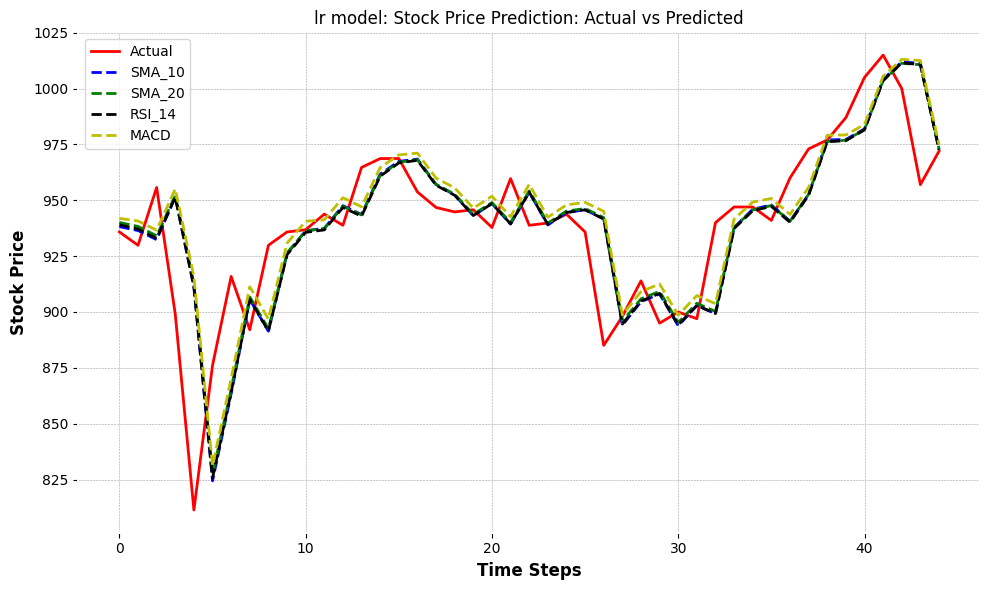

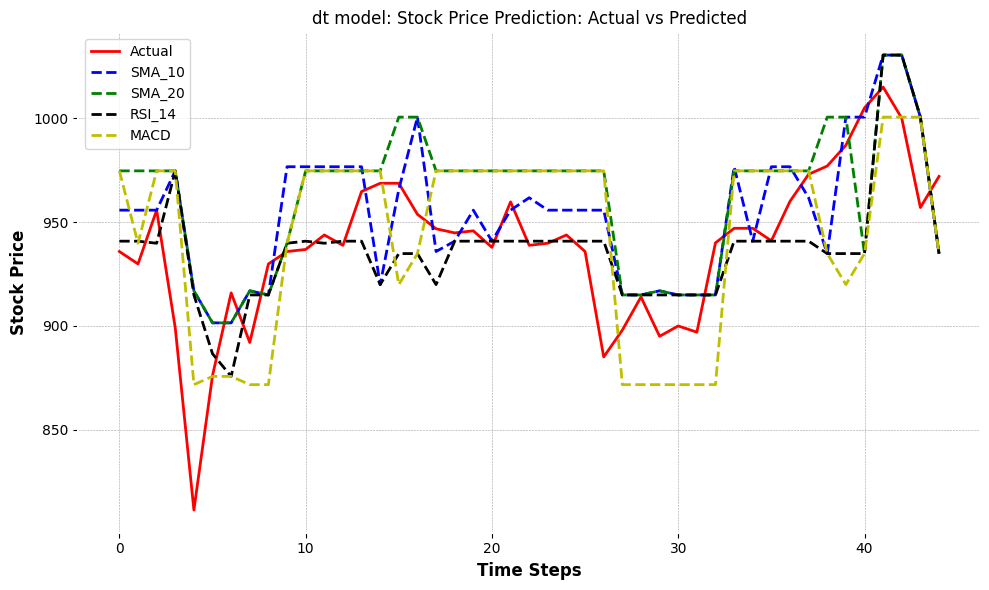

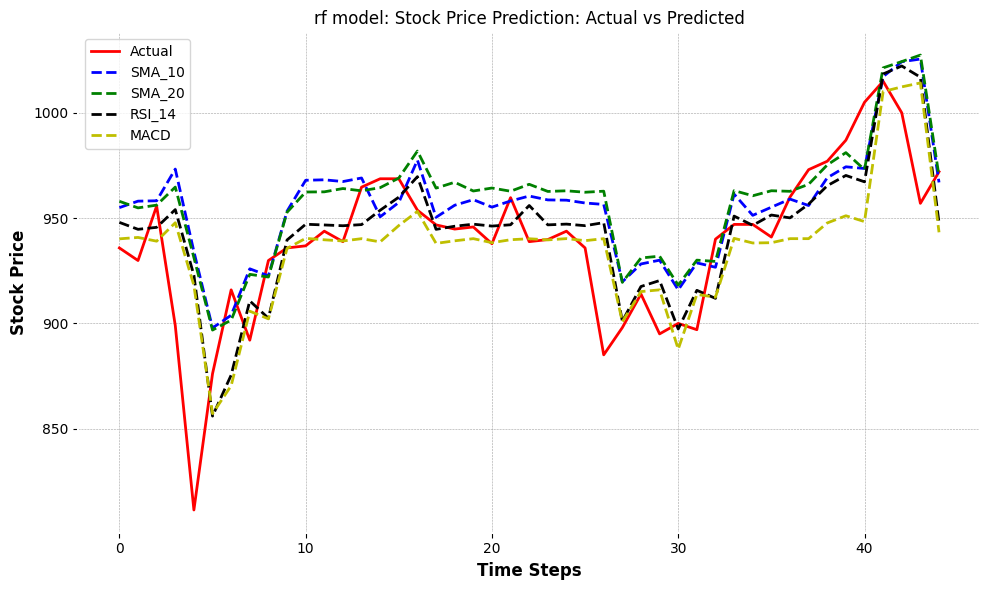

In [10]:
## 畫圖表

import matplotlib.pyplot as plt
def plt_creat(name,y_test, data1, data2, data3, data4):
    plt.figure(figsize=(10, 6))

    plt.plot(y_test.values, label='Actual', color='red', linewidth=2)

    plt.plot(data1, label='SMA_10', linestyle='--', color='blue')
    plt.plot(data2, label='SMA_20', linestyle='--', color='green')
    plt.plot(data3, label='RSI_14', linestyle='--', color='black')
    plt.plot(data4, label='MACD', linestyle='--', color='y')

    plt.title(name+' Stock Price Prediction: Actual vs Predicted')
    plt.xlabel('Time Steps')
    plt.ylabel('Stock Price')

    plt.legend()

    plt.tight_layout()
    plt.show()

plt_creat('lr model:', y_test, r2_lr_SMA_10, r2_lr_SMA_20, r2_lr_RSI_14, r2_lr_MACD)
plt_creat('dt model:', y_test, r2_dt_SMA_10, r2_dt_SMA_20, r2_dt_RSI_14, r2_dt_MACD)
plt_creat('rf model:', y_test, r2_rf_SMA_10, r2_rf_SMA_20, r2_rf_RSI_14, r2_rf_MACD)

